# Ioannou_Georgios

## Copyright © 2021 by Georgios Ioannou

## <center>Libraries</center>

In [1]:
# import libraries

from math import log             # Provides the log function
import time                      # Provides the time function
import sys                       # Provides the float_info function
import pandas as pd              # Provides the functions needed to create the tables
import matplotlib.pyplot as plt  # Provides the functions needed to plot the graphs

## <center>Machine Environment</center>

In [2]:
# machine environment

print("Machine environment")
print("\n", sys.float_info)
mepsilon = sys.float_info.epsilon
print("\nmachine epsilon=", mepsilon)

Machine environment

 sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

machine epsilon= 2.220446049250313e-16


## <center>Division Algorithms</center>

### <center>For These Algorithms the Following Notation is Used:</center>
#### n = numerator 
#### d = denominator 
#### q = quotient 
#### r = remainder 

## <center>Naive Division Algorithm</center>

In [3]:
def naive_division_algorithm(n, d):
    r = n
    q = 0.0
    while r >= d:
        r -= d
        q += 1.0
    return q, r

## <center>Long Division Algorithm</center>

In [4]:
def first(quotient_multiply_by_divisor, numerator_list):
    size = len(str(quotient_multiply_by_divisor))
    subtraction_term_string = ""
    for i in range(size):
        subtraction_term_string += str(numerator_list[i])
    if int(subtraction_term_string) < quotient_multiply_by_divisor:
        size += 1
    subtraction_term_string = ""
    for i in range(size):
        subtraction_term = numerator_list.pop(0)
        subtraction_term_string += str(subtraction_term)
        remainder = int(subtraction_term_string) - quotient_multiply_by_divisor
    return remainder


def long_division_algorithm(n, d):
    numerator_list = [int(x) for x in str(n)]
    i = 0
    quotient = ""
    first_turn = True

    valid_dividend = numerator_list[i]
    valid_dividend_string = str(valid_dividend)

    while int(valid_dividend_string) < d:
        i += 1
        valid_dividend = numerator_list[i]
        valid_dividend_string += str(valid_dividend)
    while len(numerator_list) != 0:
        j = 0
        while (d * j) <= int(valid_dividend_string):
            j += 1
        quotient += str((j - 1))

        quotient_multiply_by_divisor = int(quotient) % 10 * d
        if first_turn:
            remainder = first(quotient_multiply_by_divisor, numerator_list)
            first_turn = False
        else:
            remainder = int(valid_dividend_string) - quotient_multiply_by_divisor
            numerator_list.pop(0)
        if len(numerator_list) == 0:
            q = int(quotient)
            r = n - (q * d)
            return q, r
        else:
            valid_dividend_string = str(remainder) + str(numerator_list[0])
    return int(quotient), n - (int(quotient) * d)

## <center>Restoring Division Algorithm</center>

In [5]:
def complement(m):
    d = {'0': '1', '1': '0'}
    e = ''.join(d[x] for x in m)
    l = len(e)
    sum = bin(int(e, 2) + int('1', 2))
    sum = sum[2:]
    return sum.zfill(l)


def shift_left(s):
    s = s[1:]
    s += '0'
    return s


def add_zero_to_string(x):
    x = list(x)
    x[-1] = '0'
    return ''.join(x)


def add_one_to_string(x):
    x = list(x)
    x[-1] = '1'
    return ''.join(x)


def restoring_division_algorithm(n, d):
    q = bin(n)
    m = bin(d)

    q = q[2:]
    m = m[2:]

    if len(m) > len(q):
        q = q.zfill(len(m))
    else:
        m = m.zfill(len(q))

    l = len(q)
    count = l
    mc = complement(m)

    a = '0'
    for i in range(0, l - 1):
        a = a + '0'

    while count > 0:
        s = a + q
        value = shift_left(s)
        a = value[0:l]
        q = value[l:]
        a = bin(int(a, 2) + int(mc, 2))
        if len(a[2:]) == l + 1:
            a = a[3:]
        else:
            a = a[2:]
        if a[0] == '1':
            a = bin(int(a, 2) + int(m, 2))
            if len(a[2:]) == l + 1:
                a = a[3:]
            else:
                a = a[2:]
            q = add_zero_to_string(q)
        else:
            q = add_one_to_string(q)
        count -= 1
    return q, a

## <center>Non-Restoring Division Algorithm</center>

In [6]:
def add(a, m):
    carry = 0
    sum = ""

    for i in range(len(a) - 1, -1, -1):
        tmp = int(a[i]) + int(m[i]) + carry
        if tmp > 1:
            sum += str(tmp % 2)
            carry = 1
        else:
            sum += str(tmp)
            carry = 0
    return sum[::-1]


def complement_non_restoring_division(d):
    return complement(d)


def non_restoring_division_algorithm(n, d, accumulator):
    q = n
    count = len(d)
    complement_m = complement_non_restoring_division(d)
    flag = "successful"
    while count:
        accumulator = accumulator[1:] + q[0]
        if flag == "successful":
            accumulator = add(accumulator, complement_m)
        else:
            accumulator = add(accumulator, d)
        if accumulator[0] == '1':
            q = q[1:] + '0'
            flag = "unsuccessful"
        else:
            q = q[1:] + '1'
            flag = "successful"
        count -= 1
    return q, accumulator

## <center>Newton Raphson Division Algorithm</center>

In [7]:
def size(x):
    if isinstance(x, int):
        return int(log(x, 2))
    return x.numdigits(2)


def newton_raphson_division_algorithm(n, d):
    precision = 10**300
    size_n = size(n)
    size_d = size(d)
    size_r = size_n - size_d
    if min(size_n, size_d, size_r) < (2 * precision):
        return n // d
    r = (1 << (2 * precision)) // (d >> (size_d - precision))
    last_precision = precision
    for prec in range(precision, size_r + 1):
        a = r << (prec - last_precision + 1)
        b = (r**2 * (d >> size_d - prec)) >> (2 * last_precision)
        r = a - b
        last_precision = prec
    return ((n >> size_d) * r) >> size_r

## <center>Python's divmod Function</center>

In [8]:
divmod_number_of_digits_list = []
divmod_time_list = []
for i in range(21):
    j = 2**i
    d = 10**j
    n = d**2
    start_time = time.time()
    divmod(n, d)
    end_time = time.time()
    elapsed_time = end_time - start_time
    divmod_number_of_digits_list.append(j)
    divmod_time_list.append(elapsed_time)

## <center>Python's Integer Division</center>

In [9]:
integer_division_number_of_digits_list = []
integer_division_time_list = []
for i in range(23):
    j = 2**i
    d = 10**j
    n = d**2
    start_time = time.time()
    n//d
    end_time = time.time()
    elapsed_time = end_time - start_time
    integer_division_number_of_digits_list.append(j)
    integer_division_time_list.append(elapsed_time)

## <center>Polynomial Long Division Algorithm</center>

In [10]:
def degree_of_function(polynomial):
    while polynomial[0] == 0:
        polynomial.pop(0)
    return len(polynomial) - 1


def polynomial_long_division_algorithm(dividend, divisor):
    dn = degree_of_function(dividend)
    dd = degree_of_function(divisor)

    q = []
    r = dividend
    dr = dn
    i = 0
    l = 0
    while (len(r) != 0) and (dr >= dd):
        leading_term_division = r[i] / divisor[0]
        q.append(leading_term_division)

        tmp = []
        for j in range(len(divisor)):
            tmp.append(leading_term_division * divisor[j])

        for k in range(len(tmp)):
            r[k + l] = r[k + l] - tmp[k]
        dr -= 1
        i += 1
        l += 1
    return q, r

## <center>Polynomial Extended Synthetic Division Algorithm</center>

In [11]:
def polynomial_extended_synthetic_division_algorithm(dividend, divisor):
    normalizer = divisor[0]
    for i in range(len(dividend) - len(divisor) + 1):
        dividend[i] /= normalizer
        coefficient = dividend[i]
        if coefficient != 0:
            for j in range(1, len(divisor)):
                dividend[i + j] += -divisor[j] * coefficient
    separator = 1 - len(divisor)
    return dividend[:separator], dividend[separator:]

## <center>Calculate the Number of Digits, Highest Degree, and Time Used for Each Division Algorithm</center>

In [12]:
# naive_division_algorithm
naive_division_number_of_digits_list = []
naive_division_time_list = []
for i in range(4):
    j = 2**i
    d = 10**j
    n = d**2
    start_time = time.time()
    naive_division_algorithm(n, d)
    end_time = time.time()
    elapsed_time = end_time - start_time
    naive_division_number_of_digits_list.append(j)
    naive_division_time_list.append(elapsed_time)


# long_division_algorithm
long_division_number_of_digits_list = []
long_division_time_list = []
for i in range(16):
    j = 2**i
    d = 10**j
    n = d**2
    start_time = time.time()
    long_division_algorithm(n, d)
    end_time = time.time()
    elapsed_time = end_time - start_time
    long_division_number_of_digits_list.append(j)
    long_division_time_list.append(elapsed_time)


# restoring_division_algorithm
restoring_division_number_of_digits_list = []
restoring_division_time_list = []
for i in range(14):
    j = 2**i
    d = 10**j
    n = d**2
    start_time = time.time()
    restoring_division_algorithm(n, d)
    end_time = time.time()
    elapsed_time = end_time - start_time
    restoring_division_number_of_digits_list.append(j)
    restoring_division_time_list.append(elapsed_time)


# non_restoring_division_algorithm
non_restoring_division_number_of_digits_list = []
non_restoring_division_time_list = []
for i in range(10):
    j = 2**i
    d = 10**j
    d_binary = '{0:03934b}'.format(d)
    n = d**2
    n_binary = '{0:03934b}'.format(n)
    accumulator = '0' * len(n_binary)
    start_time = time.time()
    non_restoring_division_algorithm(n_binary, d_binary, accumulator)
    end_time = time.time()
    elapsed_time = end_time - start_time
    non_restoring_division_number_of_digits_list.append(j)
    non_restoring_division_time_list.append(elapsed_time)


# non_restoring_division_algorithm
non_restoring_division_2_number_of_digits_list = []
non_restoring_division_2_time_list = []
for i in range(11):
    j = 2**i
    d = 10**j
    d_binary = '{0:07934b}'.format(d)
    n = d**2
    n_binary = '{0:07934b}'.format(n)
    accumulator = '0' * len(n_binary)
    start_time = time.time()
    non_restoring_division_algorithm(n_binary, d_binary, accumulator)
    end_time = time.time()
    elapsed_time = end_time - start_time
    non_restoring_division_2_number_of_digits_list.append(j)
    non_restoring_division_2_time_list.append(elapsed_time)


# newton_raphson_division_algorithm
newton_raphson_division_number_of_digits_list = []
newton_raphson_division_time_list = []
for i in range(21):
    j = 2**i
    d = 10**j
    n = d**2
    start_time = time.time()
    newton_raphson_division_algorithm(n, d)
    end_time = time.time()
    elapsed_time = end_time - start_time
    newton_raphson_division_number_of_digits_list.append(j)
    newton_raphson_division_time_list.append(elapsed_time)


# polynomial_long_division_algorithm
polynomial_long_division_highest_degree_list = []
polynomial_long_division_time_list = []
n = []
d = []
for i in range(5001, 300002, 29500):
    for j in range(i + 1):
        if j % 2 == 0:
            n.append(10**100)
        else:
            n.append(-(10**100))
    for j in range(i):
        if j % 2 == 0:
            d.append(15**85)
        else:
            d.append(-(15**85))
    if len(d) != 0:
        d.pop()
    if len(d) == 0:
        d.append(15 ** 85)
    start_time = time.time()
    q, r = polynomial_long_division_algorithm(n, d)
    end_time = time.time()
    elapsed_time = end_time - start_time
    polynomial_long_division_highest_degree_list.append(i)
    polynomial_long_division_time_list.append(elapsed_time)
    n.clear()
    d.clear()


# polynomial_extended_synthetic_division_algorithm
polynomial_extended_synthetic_division_highest_degree_list = []
polynomial_extended_synthetic_division_time_list = []
for i in range(5001, 300002, 29500):
    for j in range(i + 1):
        if j % 2 == 0:
            n.append(10**100)
        else:
            n.append(-(10**100))
    for j in range(i):
        if j % 2 == 0:
            d.append(15**85)
        else:
            d.append(-(15**85))
    if len(d) != 0:
        d.pop()
    if len(d) == 0:
        d.append(15 ** 85)
    start_time = time.time()
    q, r = polynomial_extended_synthetic_division_algorithm(n, d)
    end_time = time.time()
    elapsed_time = end_time - start_time
    polynomial_extended_synthetic_division_highest_degree_list.append(i)
    polynomial_extended_synthetic_division_time_list.append(elapsed_time)
    n.clear()
    d.clear()

## <center>Create the Tables</center>

In [13]:
# Create the table with the results of the naive_division_algorithm

data = [[naive_division_number_of_digits_list[0] * 2 + 1 , naive_division_number_of_digits_list[0] + 1, naive_division_time_list[0]],
        [naive_division_number_of_digits_list[1] * 2 + 1 , naive_division_number_of_digits_list[1] + 1, naive_division_time_list[1]],
        [naive_division_number_of_digits_list[2] * 2 + 1 , naive_division_number_of_digits_list[2] + 1, naive_division_time_list[2]],
        [naive_division_number_of_digits_list[3] * 2 + 1 , naive_division_number_of_digits_list[3] + 1, naive_division_time_list[3]]
       ]
index = ["1", "2", "3", "4"]
headings = ["Numerator Digits", "Denominator Digits", "Time(s)"]
table_naive_division_algorithm = pd.DataFrame(data, index, headings)

In [14]:
# Create the table with the results of the long_division_algorithm

data = [[long_division_number_of_digits_list[0] * 2 + 1 , long_division_number_of_digits_list[0] + 1, long_division_time_list[0]],
        [long_division_number_of_digits_list[1] * 2 + 1 , long_division_number_of_digits_list[1] + 1, long_division_time_list[1]],
        [long_division_number_of_digits_list[2] * 2 + 1 , long_division_number_of_digits_list[2] + 1, long_division_time_list[2]],
        [long_division_number_of_digits_list[3] * 2 + 1 , long_division_number_of_digits_list[3] + 1, long_division_time_list[3]],
        [long_division_number_of_digits_list[4] * 2 + 1 , long_division_number_of_digits_list[4] + 1, long_division_time_list[4]],
        [long_division_number_of_digits_list[5] * 2 + 1 , long_division_number_of_digits_list[5] + 1, long_division_time_list[5]],
        [long_division_number_of_digits_list[6] * 2 + 1 , long_division_number_of_digits_list[6] + 1, long_division_time_list[6]],
        [long_division_number_of_digits_list[7] * 2 + 1 , long_division_number_of_digits_list[7] + 1, long_division_time_list[7]],
        [long_division_number_of_digits_list[8] * 2 + 1 , long_division_number_of_digits_list[8] + 1, long_division_time_list[8]],
        [long_division_number_of_digits_list[9] * 2 + 1 , long_division_number_of_digits_list[9] + 1, long_division_time_list[9]],
        [long_division_number_of_digits_list[10] * 2 + 1 , long_division_number_of_digits_list[10] + 1, long_division_time_list[10]],
        [long_division_number_of_digits_list[11] * 2 + 1 , long_division_number_of_digits_list[11] + 1, long_division_time_list[11]],
        [long_division_number_of_digits_list[12] * 2 + 1 , long_division_number_of_digits_list[12] + 1, long_division_time_list[12]],
        [long_division_number_of_digits_list[13] * 2 + 1 , long_division_number_of_digits_list[13] + 1, long_division_time_list[13]],
        [long_division_number_of_digits_list[14] * 2 + 1 , long_division_number_of_digits_list[14] + 1, long_division_time_list[14]],
        [long_division_number_of_digits_list[15] * 2 + 1 , long_division_number_of_digits_list[15] + 1, long_division_time_list[15]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"]
headings = ["Numerator Digits", "Denominator Digits", "Time(s)"]
table_long_division_algorithm = pd.DataFrame(data, index, headings)

In [15]:
# Create the table with the results of the restoring_division_algorithm

data = [[restoring_division_number_of_digits_list[0] * 2 + 1 , restoring_division_number_of_digits_list[0] + 1, restoring_division_time_list[0]],
        [restoring_division_number_of_digits_list[1] * 2 + 1 , restoring_division_number_of_digits_list[1] + 1, restoring_division_time_list[1]],
        [restoring_division_number_of_digits_list[2] * 2 + 1 , restoring_division_number_of_digits_list[2] + 1, restoring_division_time_list[2]],
        [restoring_division_number_of_digits_list[3] * 2 + 1 , restoring_division_number_of_digits_list[3] + 1, restoring_division_time_list[3]],
        [restoring_division_number_of_digits_list[4] * 2 + 1 , restoring_division_number_of_digits_list[4] + 1, restoring_division_time_list[4]],
        [restoring_division_number_of_digits_list[5] * 2 + 1 , restoring_division_number_of_digits_list[5] + 1, restoring_division_time_list[5]],
        [restoring_division_number_of_digits_list[6] * 2 + 1 , restoring_division_number_of_digits_list[6] + 1, restoring_division_time_list[6]],
        [restoring_division_number_of_digits_list[7] * 2 + 1 , restoring_division_number_of_digits_list[7] + 1, restoring_division_time_list[7]],
        [restoring_division_number_of_digits_list[8] * 2 + 1 , restoring_division_number_of_digits_list[8] + 1, restoring_division_time_list[8]],
        [restoring_division_number_of_digits_list[9] * 2 + 1 , restoring_division_number_of_digits_list[9] + 1, restoring_division_time_list[9]],
        [restoring_division_number_of_digits_list[10] * 2 + 1 , restoring_division_number_of_digits_list[10] + 1, restoring_division_time_list[10]],
        [restoring_division_number_of_digits_list[11] * 2 + 1 , restoring_division_number_of_digits_list[11] + 1, restoring_division_time_list[11]],
        [restoring_division_number_of_digits_list[12] * 2 + 1 , restoring_division_number_of_digits_list[12] + 1, restoring_division_time_list[12]],
        [restoring_division_number_of_digits_list[13] * 2 + 1 , restoring_division_number_of_digits_list[13] + 1, restoring_division_time_list[13]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"]
headings = ["Numerator Digits", "Denominator Digits", "Time(s)"]
table_restoring_division_algorithm = pd.DataFrame(data, index, headings)

In [16]:
# Create the first table with the results of the non_restoring_division_algorithm

data = [[non_restoring_division_number_of_digits_list[0] * 2 + 1 , non_restoring_division_number_of_digits_list[0] + 1, non_restoring_division_time_list[0]],
        [non_restoring_division_number_of_digits_list[1] * 2 + 1 , non_restoring_division_number_of_digits_list[1] + 1, non_restoring_division_time_list[1]],
        [non_restoring_division_number_of_digits_list[2] * 2 + 1 , non_restoring_division_number_of_digits_list[2] + 1, non_restoring_division_time_list[2]],
        [non_restoring_division_number_of_digits_list[3] * 2 + 1 , non_restoring_division_number_of_digits_list[3] + 1, non_restoring_division_time_list[3]],
        [non_restoring_division_number_of_digits_list[4] * 2 + 1 , non_restoring_division_number_of_digits_list[4] + 1, non_restoring_division_time_list[4]],
        [non_restoring_division_number_of_digits_list[5] * 2 + 1 , non_restoring_division_number_of_digits_list[5] + 1, non_restoring_division_time_list[5]],
        [non_restoring_division_number_of_digits_list[6] * 2 + 1 , non_restoring_division_number_of_digits_list[6] + 1, non_restoring_division_time_list[6]],
        [non_restoring_division_number_of_digits_list[7] * 2 + 1 , non_restoring_division_number_of_digits_list[7] + 1, non_restoring_division_time_list[7]],
        [non_restoring_division_number_of_digits_list[8] * 2 + 1 , non_restoring_division_number_of_digits_list[8] + 1, non_restoring_division_time_list[8]],
        [non_restoring_division_number_of_digits_list[9] * 2 + 1 , non_restoring_division_number_of_digits_list[9] + 1, non_restoring_division_time_list[9]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
headings = ["Numerator Digits", "Denominator Digits", "Time(s)"]
table_non_restoring_division_algorithm = pd.DataFrame(data, index, headings)

In [17]:
# Create the second table with the results of the non_restoring_division_algorithm

data = [[non_restoring_division_2_number_of_digits_list[0] * 2 + 1 , non_restoring_division_2_number_of_digits_list[0] + 1, non_restoring_division_2_time_list[0]],
        [non_restoring_division_2_number_of_digits_list[1] * 2 + 1 , non_restoring_division_2_number_of_digits_list[1] + 1, non_restoring_division_2_time_list[1]],
        [non_restoring_division_2_number_of_digits_list[2] * 2 + 1 , non_restoring_division_2_number_of_digits_list[2] + 1, non_restoring_division_2_time_list[2]],
        [non_restoring_division_2_number_of_digits_list[3] * 2 + 1 , non_restoring_division_2_number_of_digits_list[3] + 1, non_restoring_division_2_time_list[3]],
        [non_restoring_division_2_number_of_digits_list[4] * 2 + 1 , non_restoring_division_2_number_of_digits_list[4] + 1, non_restoring_division_2_time_list[4]],
        [non_restoring_division_2_number_of_digits_list[5] * 2 + 1 , non_restoring_division_2_number_of_digits_list[5] + 1, non_restoring_division_2_time_list[5]],
        [non_restoring_division_2_number_of_digits_list[6] * 2 + 1 , non_restoring_division_2_number_of_digits_list[6] + 1, non_restoring_division_2_time_list[6]],
        [non_restoring_division_2_number_of_digits_list[7] * 2 + 1 , non_restoring_division_2_number_of_digits_list[7] + 1, non_restoring_division_2_time_list[7]],
        [non_restoring_division_2_number_of_digits_list[8] * 2 + 1 , non_restoring_division_2_number_of_digits_list[8] + 1, non_restoring_division_2_time_list[8]],
        [non_restoring_division_2_number_of_digits_list[9] * 2 + 1 , non_restoring_division_2_number_of_digits_list[9] + 1, non_restoring_division_2_time_list[9]],
        [non_restoring_division_2_number_of_digits_list[10] * 2 + 1 , non_restoring_division_2_number_of_digits_list[10] + 1, non_restoring_division_2_time_list[10]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
headings = ["Numerator Digits", "Denominator Digits", "Time"]
table_2_non_restoring_division_algorithm = pd.DataFrame(data, index, headings)

In [18]:
# Create the table with the results of the newton_raphson_division_algorithm

data = [[newton_raphson_division_number_of_digits_list[0] * 2 + 1 , newton_raphson_division_number_of_digits_list[0] + 1, newton_raphson_division_time_list[0]],
        [newton_raphson_division_number_of_digits_list[1] * 2 + 1 , newton_raphson_division_number_of_digits_list[1] + 1, newton_raphson_division_time_list[1]],
        [newton_raphson_division_number_of_digits_list[2] * 2 + 1 , newton_raphson_division_number_of_digits_list[2] + 1, newton_raphson_division_time_list[2]],
        [newton_raphson_division_number_of_digits_list[3] * 2 + 1 , newton_raphson_division_number_of_digits_list[3] + 1, newton_raphson_division_time_list[3]],
        [newton_raphson_division_number_of_digits_list[4] * 2 + 1 , newton_raphson_division_number_of_digits_list[4] + 1, newton_raphson_division_time_list[4]],
        [newton_raphson_division_number_of_digits_list[5] * 2 + 1 , newton_raphson_division_number_of_digits_list[5] + 1, newton_raphson_division_time_list[5]],
        [newton_raphson_division_number_of_digits_list[6] * 2 + 1 , newton_raphson_division_number_of_digits_list[6] + 1, newton_raphson_division_time_list[6]],
        [newton_raphson_division_number_of_digits_list[7] * 2 + 1 , newton_raphson_division_number_of_digits_list[7] + 1, newton_raphson_division_time_list[7]],
        [newton_raphson_division_number_of_digits_list[8] * 2 + 1 , newton_raphson_division_number_of_digits_list[8] + 1, newton_raphson_division_time_list[8]],
        [newton_raphson_division_number_of_digits_list[9] * 2 + 1 , newton_raphson_division_number_of_digits_list[9] + 1, newton_raphson_division_time_list[9]],
        [newton_raphson_division_number_of_digits_list[10] * 2 + 1 , newton_raphson_division_number_of_digits_list[10] + 1, newton_raphson_division_time_list[10]],
        [newton_raphson_division_number_of_digits_list[11] * 2 + 1 , newton_raphson_division_number_of_digits_list[11] + 1, newton_raphson_division_time_list[11]],
        [newton_raphson_division_number_of_digits_list[12] * 2 + 1 , newton_raphson_division_number_of_digits_list[12] + 1, newton_raphson_division_time_list[12]],
        [newton_raphson_division_number_of_digits_list[13] * 2 + 1 , newton_raphson_division_number_of_digits_list[13] + 1, newton_raphson_division_time_list[13]],
        [newton_raphson_division_number_of_digits_list[14] * 2 + 1 , newton_raphson_division_number_of_digits_list[14] + 1, newton_raphson_division_time_list[14]],
        [newton_raphson_division_number_of_digits_list[15] * 2 + 1 , newton_raphson_division_number_of_digits_list[15] + 1, newton_raphson_division_time_list[15]],
        [newton_raphson_division_number_of_digits_list[16] * 2 + 1 , newton_raphson_division_number_of_digits_list[16] + 1, newton_raphson_division_time_list[16]],
        [newton_raphson_division_number_of_digits_list[17] * 2 + 1 , newton_raphson_division_number_of_digits_list[17] + 1, newton_raphson_division_time_list[17]],
        [newton_raphson_division_number_of_digits_list[18] * 2 + 1 , newton_raphson_division_number_of_digits_list[18] + 1, newton_raphson_division_time_list[18]],
        [newton_raphson_division_number_of_digits_list[19] * 2 + 1 , newton_raphson_division_number_of_digits_list[19] + 1, newton_raphson_division_time_list[19]],
        [newton_raphson_division_number_of_digits_list[20] * 2 + 1 , newton_raphson_division_number_of_digits_list[20] + 1, newton_raphson_division_time_list[20]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]
headings = ["Numerator Digits", "Denominator Digits", "Time(s)"]
table_newton_raphson_division_algorithm = pd.DataFrame(data, index, headings)

In [19]:
# Create the table with the results of Python's divmod function

data = [[divmod_number_of_digits_list[0] * 2 + 1 , divmod_number_of_digits_list[0] + 1, divmod_time_list[0]],
        [divmod_number_of_digits_list[1] * 2 + 1 , divmod_number_of_digits_list[1] + 1, divmod_time_list[1]],
        [divmod_number_of_digits_list[2] * 2 + 1 , divmod_number_of_digits_list[2] + 1, divmod_time_list[2]],
        [divmod_number_of_digits_list[3] * 2 + 1 , divmod_number_of_digits_list[3] + 1, divmod_time_list[3]],
        [divmod_number_of_digits_list[4] * 2 + 1 , divmod_number_of_digits_list[4] + 1, divmod_time_list[4]],
        [divmod_number_of_digits_list[5] * 2 + 1 , divmod_number_of_digits_list[5] + 1, divmod_time_list[5]],
        [divmod_number_of_digits_list[6] * 2 + 1 , divmod_number_of_digits_list[6] + 1, divmod_time_list[6]],
        [divmod_number_of_digits_list[7] * 2 + 1 , divmod_number_of_digits_list[7] + 1, divmod_time_list[7]],
        [divmod_number_of_digits_list[8] * 2 + 1 , divmod_number_of_digits_list[8] + 1, divmod_time_list[8]],
        [divmod_number_of_digits_list[9] * 2 + 1 , divmod_number_of_digits_list[9] + 1, divmod_time_list[9]],
        [divmod_number_of_digits_list[10] * 2 + 1 , divmod_number_of_digits_list[10] + 1, divmod_time_list[10]],
        [divmod_number_of_digits_list[11] * 2 + 1 , divmod_number_of_digits_list[11] + 1, divmod_time_list[11]],
        [divmod_number_of_digits_list[12] * 2 + 1 , divmod_number_of_digits_list[12] + 1, divmod_time_list[12]],
        [divmod_number_of_digits_list[13] * 2 + 1 , divmod_number_of_digits_list[13] + 1, divmod_time_list[13]],
        [divmod_number_of_digits_list[14] * 2 + 1 , divmod_number_of_digits_list[14] + 1, divmod_time_list[14]],
        [divmod_number_of_digits_list[15] * 2 + 1 , divmod_number_of_digits_list[15] + 1, divmod_time_list[15]],
        [divmod_number_of_digits_list[16] * 2 + 1 , divmod_number_of_digits_list[16] + 1, divmod_time_list[16]],
        [divmod_number_of_digits_list[17] * 2 + 1 , divmod_number_of_digits_list[17] + 1, divmod_time_list[17]],
        [divmod_number_of_digits_list[18] * 2 + 1 , divmod_number_of_digits_list[18] + 1, divmod_time_list[18]],
        [divmod_number_of_digits_list[19] * 2 + 1 , divmod_number_of_digits_list[19] + 1, divmod_time_list[19]],
        [divmod_number_of_digits_list[20] * 2 + 1 , divmod_number_of_digits_list[20] + 1, divmod_time_list[20]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]
headings = ["Numerator Digits", "Denominator Digits", "Time(s)"]
table_divmod_function = pd.DataFrame(data, index, headings)

In [20]:
# Create the table with the results of Python's integer division

data = [[integer_division_number_of_digits_list[0] * 2 + 1 , integer_division_number_of_digits_list[0] + 1, integer_division_time_list[0]],
        [integer_division_number_of_digits_list[1] * 2 + 1 , integer_division_number_of_digits_list[1] + 1, integer_division_time_list[1]],
        [integer_division_number_of_digits_list[2] * 2 + 1 , integer_division_number_of_digits_list[2] + 1, integer_division_time_list[2]],
        [integer_division_number_of_digits_list[3] * 2 + 1 , integer_division_number_of_digits_list[3] + 1, integer_division_time_list[3]],
        [integer_division_number_of_digits_list[4] * 2 + 1 , integer_division_number_of_digits_list[4] + 1, integer_division_time_list[4]],
        [integer_division_number_of_digits_list[5] * 2 + 1 , integer_division_number_of_digits_list[5] + 1, integer_division_time_list[5]],
        [integer_division_number_of_digits_list[6] * 2 + 1 , integer_division_number_of_digits_list[6] + 1, integer_division_time_list[6]],
        [integer_division_number_of_digits_list[7] * 2 + 1 , integer_division_number_of_digits_list[7] + 1, integer_division_time_list[7]],
        [integer_division_number_of_digits_list[8] * 2 + 1 , integer_division_number_of_digits_list[8] + 1, integer_division_time_list[8]],
        [integer_division_number_of_digits_list[9] * 2 + 1 , integer_division_number_of_digits_list[9] + 1, integer_division_time_list[9]],
        [integer_division_number_of_digits_list[10] * 2 + 1 , integer_division_number_of_digits_list[10] + 1, integer_division_time_list[10]],
        [integer_division_number_of_digits_list[11] * 2 + 1 , integer_division_number_of_digits_list[11] + 1, integer_division_time_list[11]],
        [integer_division_number_of_digits_list[12] * 2 + 1 , integer_division_number_of_digits_list[12] + 1, integer_division_time_list[12]],
        [integer_division_number_of_digits_list[13] * 2 + 1 , integer_division_number_of_digits_list[13] + 1, integer_division_time_list[13]],
        [integer_division_number_of_digits_list[14] * 2 + 1 , integer_division_number_of_digits_list[14] + 1, integer_division_time_list[14]],
        [integer_division_number_of_digits_list[15] * 2 + 1 , integer_division_number_of_digits_list[15] + 1, integer_division_time_list[15]],
        [integer_division_number_of_digits_list[16] * 2 + 1 , integer_division_number_of_digits_list[16] + 1, integer_division_time_list[16]],
        [integer_division_number_of_digits_list[17] * 2 + 1 , integer_division_number_of_digits_list[17] + 1, integer_division_time_list[17]],
        [integer_division_number_of_digits_list[18] * 2 + 1 , integer_division_number_of_digits_list[18] + 1, integer_division_time_list[18]],
        [integer_division_number_of_digits_list[19] * 2 + 1 , integer_division_number_of_digits_list[19] + 1, integer_division_time_list[19]],
        [integer_division_number_of_digits_list[20] * 2 + 1 , integer_division_number_of_digits_list[20] + 1, integer_division_time_list[20]],
        [integer_division_number_of_digits_list[21] * 2 + 1 , integer_division_number_of_digits_list[21] + 1, integer_division_time_list[21]],
        [integer_division_number_of_digits_list[22] * 2 + 1 , integer_division_number_of_digits_list[22] + 1, integer_division_time_list[22]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
headings = ["Numerator Digits", "Denominator Digits", "Time(s)"]
table_integer_division = pd.DataFrame(data, index, headings)

In [21]:
# Create the second table with the results of the polynomial_long_division_algorithm


data = [[polynomial_long_division_highest_degree_list[0] + 1 , polynomial_long_division_highest_degree_list[0] - 1, polynomial_long_division_time_list[0]],
        [polynomial_long_division_highest_degree_list[1] + 1 , polynomial_long_division_highest_degree_list[1] - 1, polynomial_long_division_time_list[1]],
        [polynomial_long_division_highest_degree_list[2] + 1 , polynomial_long_division_highest_degree_list[2] - 1, polynomial_long_division_time_list[2]],
        [polynomial_long_division_highest_degree_list[3] + 1 , polynomial_long_division_highest_degree_list[3] - 1, polynomial_long_division_time_list[3]],
        [polynomial_long_division_highest_degree_list[4] + 1 , polynomial_long_division_highest_degree_list[4] - 1, polynomial_long_division_time_list[4]],
        [polynomial_long_division_highest_degree_list[5] + 1 , polynomial_long_division_highest_degree_list[5] - 1, polynomial_long_division_time_list[5]],
        [polynomial_long_division_highest_degree_list[6] + 1 , polynomial_long_division_highest_degree_list[6] - 1, polynomial_long_division_time_list[6]],
        [polynomial_long_division_highest_degree_list[7] + 1 , polynomial_long_division_highest_degree_list[7] - 1, polynomial_long_division_time_list[7]],
        [polynomial_long_division_highest_degree_list[8] + 1 , polynomial_long_division_highest_degree_list[8] - 1, polynomial_long_division_time_list[8]],
        [polynomial_long_division_highest_degree_list[9] + 1 , polynomial_long_division_highest_degree_list[9] - 1, polynomial_long_division_time_list[9]],
        [polynomial_long_division_highest_degree_list[10] + 1 , polynomial_long_division_highest_degree_list[10] - 1, polynomial_long_division_time_list[10]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
headings = ["Numerator Highest Degree", "Denominator Highest Degree", "Time(s)"]
table_polynomial_long_division_algorithm = pd.DataFrame(data, index, headings)

In [22]:
# Create the second table with the results of the polynomial_extended_synthetic_division_algorithm

data = [[polynomial_extended_synthetic_division_highest_degree_list[0] + 1 , polynomial_extended_synthetic_division_highest_degree_list[0] - 1, polynomial_extended_synthetic_division_time_list[0]],
        [polynomial_extended_synthetic_division_highest_degree_list[1] + 1 , polynomial_extended_synthetic_division_highest_degree_list[1] - 1, polynomial_extended_synthetic_division_time_list[1]],
        [polynomial_extended_synthetic_division_highest_degree_list[2] + 1 , polynomial_extended_synthetic_division_highest_degree_list[2] - 1, polynomial_extended_synthetic_division_time_list[2]],
        [polynomial_extended_synthetic_division_highest_degree_list[3] + 1 , polynomial_extended_synthetic_division_highest_degree_list[3] - 1, polynomial_extended_synthetic_division_time_list[3]],
        [polynomial_extended_synthetic_division_highest_degree_list[4] + 1 , polynomial_extended_synthetic_division_highest_degree_list[4] - 1, polynomial_extended_synthetic_division_time_list[4]],
        [polynomial_extended_synthetic_division_highest_degree_list[5] + 1 , polynomial_extended_synthetic_division_highest_degree_list[5] - 1, polynomial_extended_synthetic_division_time_list[5]],
        [polynomial_extended_synthetic_division_highest_degree_list[6] + 1 , polynomial_extended_synthetic_division_highest_degree_list[6] - 1, polynomial_extended_synthetic_division_time_list[6]],
        [polynomial_extended_synthetic_division_highest_degree_list[7] + 1 , polynomial_extended_synthetic_division_highest_degree_list[7] - 1, polynomial_extended_synthetic_division_time_list[7]],
        [polynomial_extended_synthetic_division_highest_degree_list[8] + 1 , polynomial_extended_synthetic_division_highest_degree_list[8] - 1, polynomial_extended_synthetic_division_time_list[8]],
        [polynomial_extended_synthetic_division_highest_degree_list[9] + 1 , polynomial_extended_synthetic_division_highest_degree_list[9] - 1, polynomial_extended_synthetic_division_time_list[9]],
        [polynomial_extended_synthetic_division_highest_degree_list[10] + 1 , polynomial_extended_synthetic_division_highest_degree_list[10] - 1, polynomial_extended_synthetic_division_time_list[10]]
       ]
index = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
headings = ["Numerator Highest Degree", "Denominator Highest Degree", "Time(s)"]
table_polynomial_extended_synthetic_division_algorithm = pd.DataFrame(data, index, headings)

## <center>Display the Tables and Plot the Graphs</center>

In [23]:
# Function to increment the number_of_digits_list of each algorithm
def increment(number_of_digits_list, i):
    return [x + i for x in number_of_digits_list]

### <center>Naive Division Algorithm</center>

In [24]:
table_naive_division_algorithm.style.set_table_styles({
    "Numerator Digits": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Digits": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Digits,Denominator Digits,Time(s)
1,3,2,0.000000
2,5,3,0.000000
3,9,5,0.010991
4,17,9,84.627516


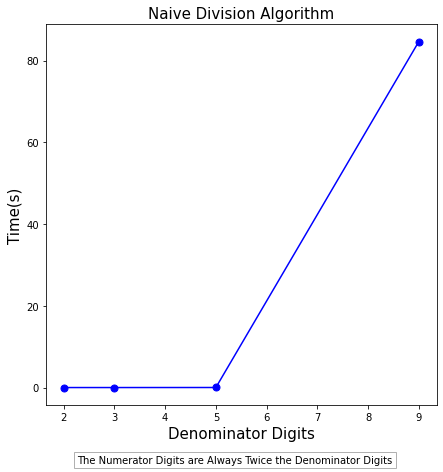

In [25]:
plt.plot(increment(naive_division_number_of_digits_list, 1), naive_division_time_list,
         color = "blue", marker = 'o', markersize = 7)
plt.xlabel("Denominator Digits", fontsize = 15)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Naive Division Algorithm", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.5, 0.01, "The Numerator Digits are Always Twice the Denominator Digits",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Long Division Algorithm</center>

In [26]:
table_long_division_algorithm.style.set_table_styles({
    "Numerator Digits": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Digits": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Digits,Denominator Digits,Time(s)
1,3,2,0.000000
2,5,3,0.000000
3,9,5,0.001000
4,17,9,0.000000
5,33,17,0.000000
6,65,33,0.000999
7,129,65,0.001997
8,257,129,0.003997
9,513,257,0.007992
10,1025,513,0.022979


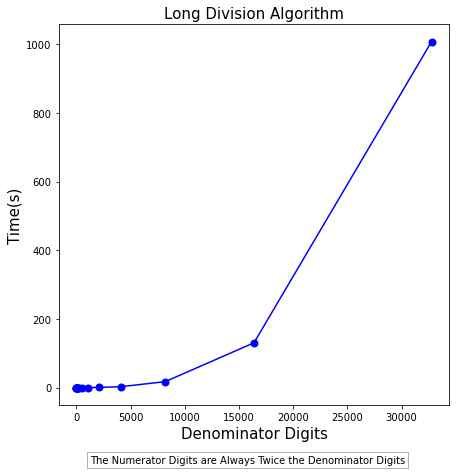

In [27]:
plt.plot(increment(long_division_number_of_digits_list, 1), long_division_time_list, 
         color = "blue", marker = 'o', markersize = 7)
plt.xlabel("Denominator Digits", fontsize = 15)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Long Division Algorithm", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.5, 0.01, "The Numerator Digits are Always Twice the Denominator Digits",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Restoring Division Algorithm</center>

In [28]:
table_restoring_division_algorithm.style.set_table_styles({
    "Numerator Digits": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Digits": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Digits,Denominator Digits,Time(s)
1,3,2,0.001000
2,5,3,0.000000
3,9,5,0.000998
4,17,9,0.000999
5,33,17,0.003997
6,65,33,0.011989
7,129,65,0.036967
8,257,129,0.133874
9,513,257,0.483552
10,1025,513,1.853281


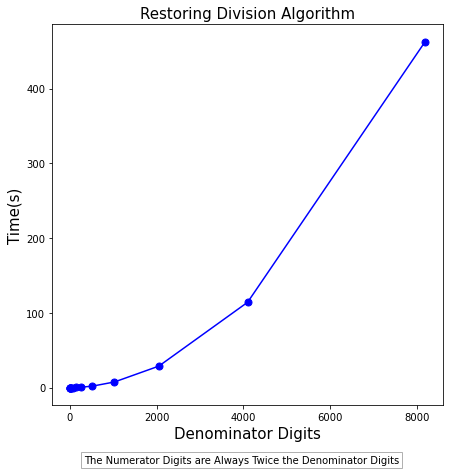

In [29]:
plt.plot(increment(restoring_division_number_of_digits_list, 1), restoring_division_time_list,
         color = "blue", marker = 'o', markersize = 7)
plt.xlabel("Denominator Digits", fontsize = 15)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Restoring Division Algorithm", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.5, 0.01, "The Numerator Digits are Always Twice the Denominator Digits",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Non-Restoring Division Algorithm Table 1 and Graph 1</center>

In [30]:
table_non_restoring_division_algorithm.style.set_table_styles({
    "Numerator Digits": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Digits": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Digits,Denominator Digits,Time(s)
1,3,2,86.672612
2,5,3,83.805259
3,9,5,83.946112
4,17,9,84.373748
5,33,17,84.718411
6,65,33,84.425683
7,129,65,84.488609
8,257,129,83.954136
9,513,257,93.925871
10,1025,513,87.674854


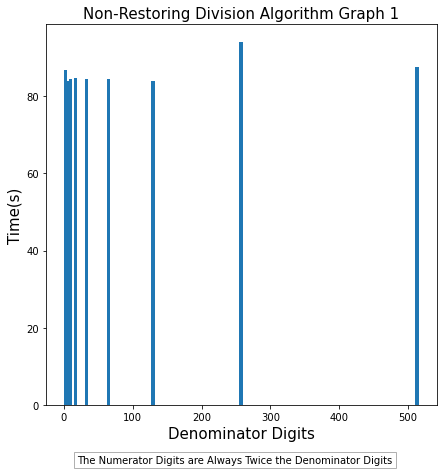

In [31]:
plt.bar(increment(non_restoring_division_number_of_digits_list, 1),non_restoring_division_time_list, width = 5)
plt.xlabel("Denominator Digits", fontsize = 15)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Non-Restoring Division Algorithm Graph 1", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.5, 0.01, "The Numerator Digits are Always Twice the Denominator Digits",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Non-Restoring Division Algorithm Table 2 and Graph 2</center>

In [32]:
table_2_non_restoring_division_algorithm.style.set_table_styles({
    "Numerator Digits": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Digits": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Digits,Denominator Digits,Time
1,3,2,370.069701
2,5,3,368.594196
3,9,5,376.286671
4,17,9,370.354443
5,33,17,368.197445
6,65,33,375.336798
7,129,65,380.020501
8,257,129,366.533988
9,513,257,371.276589
10,1025,513,370.073704


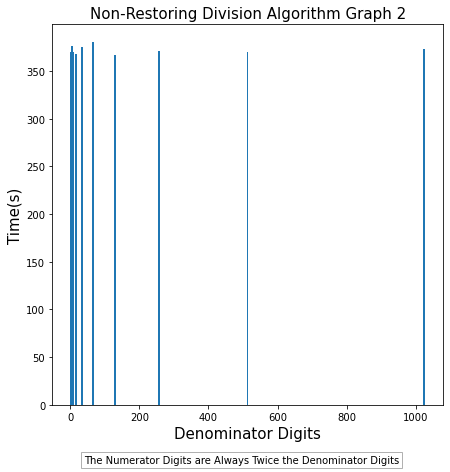

In [33]:
plt.bar(increment(non_restoring_division_2_number_of_digits_list, 1),non_restoring_division_2_time_list, width = 5)
plt.xlabel("Denominator Digits", fontsize = 15)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Non-Restoring Division Algorithm Graph 2", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.5, 0.01, "The Numerator Digits are Always Twice the Denominator Digits",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Newton Raphson Division Algorithm</center>

In [34]:
table_newton_raphson_division_algorithm.style.set_table_styles({
    "Numerator Digits": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Digits": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Digits,Denominator Digits,Time(s)
1,3,2,0.000999
2,5,3,0.000000
3,9,5,0.000000
4,17,9,0.000000
5,33,17,0.000000
6,65,33,0.000000
7,129,65,0.000000
8,257,129,0.000000
9,513,257,0.000000
10,1025,513,0.000000


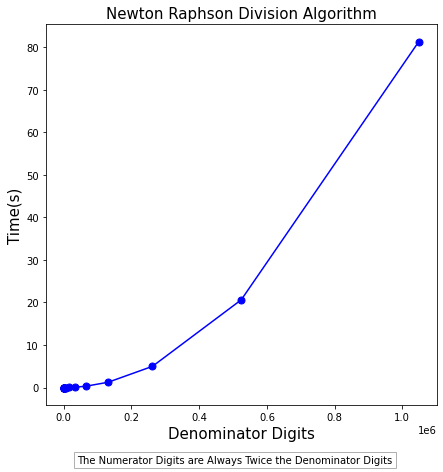

In [35]:
plt.plot(increment(newton_raphson_division_number_of_digits_list, 1), newton_raphson_division_time_list,
         color = "blue", marker = 'o', markersize = 7)
plt.xlabel("Denominator Digits", fontsize = 15)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Newton Raphson Division Algorithm", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.5, 0.01, "The Numerator Digits are Always Twice the Denominator Digits",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Python's divmod Function</center>

In [36]:
table_divmod_function.style.set_table_styles({
    "Numerator Digits": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Digits": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Digits,Denominator Digits,Time(s)
1,3,2,0.000000
2,5,3,0.000000
3,9,5,0.000000
4,17,9,0.000000
5,33,17,0.000000
6,65,33,0.000000
7,129,65,0.000000
8,257,129,0.000000
9,513,257,0.000000
10,1025,513,0.000000


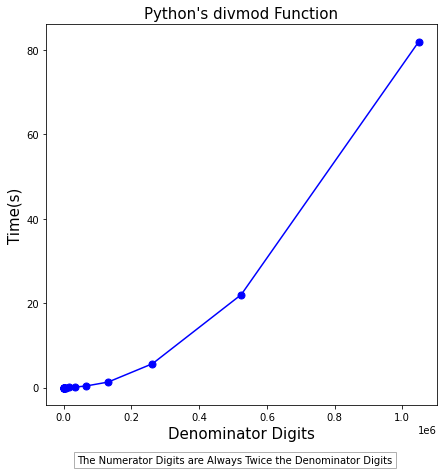

In [37]:
plt.plot(increment(divmod_number_of_digits_list, 1), divmod_time_list,
         color = "blue", marker = 'o', markersize = 7)
plt.xlabel("Denominator Digits", fontsize = 15)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Python's divmod Function", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.5, 0.01, "The Numerator Digits are Always Twice the Denominator Digits",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Python's Integer Division</center>

In [38]:
table_integer_division.style.set_table_styles({
    "Numerator Digits": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Digits": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Digits,Denominator Digits,Time(s)
1,3,2,0.000000
2,5,3,0.000000
3,9,5,0.000000
4,17,9,0.000000
5,33,17,0.000000
6,65,33,0.000000
7,129,65,0.000000
8,257,129,0.000000
9,513,257,0.000000
10,1025,513,0.000000


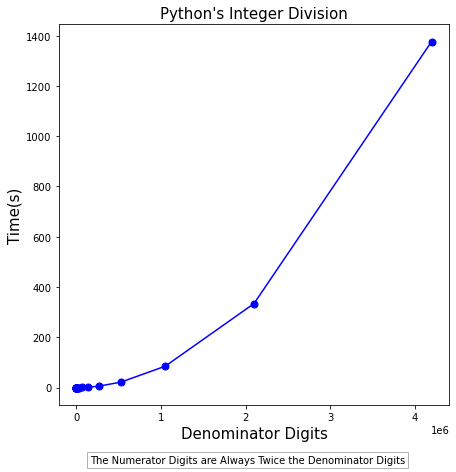

In [39]:
plt.plot(increment(integer_division_number_of_digits_list, 1), integer_division_time_list,
         color = "blue", marker = 'o', markersize = 7)
plt.xlabel("Denominator Digits", fontsize = 15)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Python's Integer Division", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.5, 0.01, "The Numerator Digits are Always Twice the Denominator Digits",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Polynomial Long Division Algorithm</center>

In [40]:
table_polynomial_long_division_algorithm.style.set_table_styles({
    "Numerator Highest Degree": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Highest Degree": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Highest Degree,Denominator Highest Degree,Time(s)
1,5002,5000,0.039962
2,34502,34500,0.274746
3,64002,64000,0.510526
4,93502,93500,0.747307
5,123002,123000,0.997053
6,152502,152500,1.326780
7,182002,182000,2.019138
8,211502,211500,1.785330
9,241002,241000,1.960184
10,270502,270500,2.251888


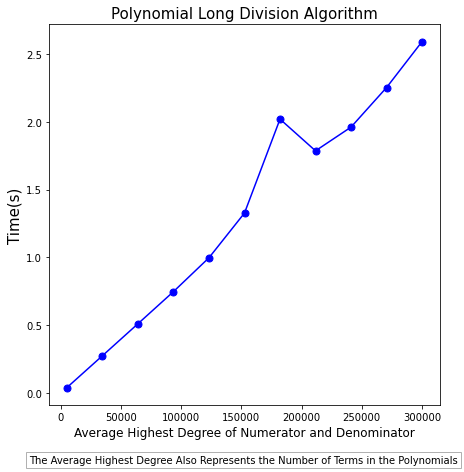

In [41]:
plt.plot(polynomial_long_division_highest_degree_list, polynomial_long_division_time_list,
         color = "blue", marker = 'o', markersize = 7)
plt.xlabel("Average Highest Degree of Numerator and Denominator", fontsize = 12)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Polynomial Long Division Algorithm", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.51, 0.01, "The Average Highest Degree Also Represents the Number of Terms in the Polynomials",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()

### <center>Polynomial Extended Synthetic Division Algorithm</center>

In [42]:
table_polynomial_extended_synthetic_division_algorithm.style.set_table_styles({
    "Numerator Highest Degree": [{'selector': '', 'props': 'text-align: center;'}],
    "Denominator Highest Degree": [{'selector':'','props': 'text-align: center ;'}],
    "Time(s)": [{'selector':'','props': 'text-align: center ; '}]
})

,Numerator Highest Degree,Denominator Highest Degree,Time(s)
1,5002,5000,0.018982
2,34502,34500,0.140893
3,64002,64000,0.254762
4,93502,93500,0.382647
5,123002,123000,0.490546
6,152502,152500,0.616430
7,182002,182000,0.728325
8,211502,211500,0.934136
9,241002,241000,0.970101
10,270502,270500,1.143923


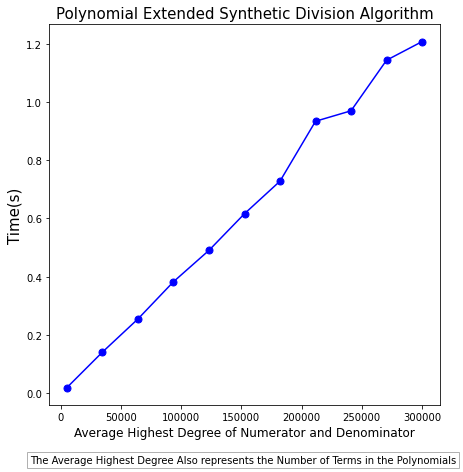

In [43]:
plt.plot(polynomial_extended_synthetic_division_highest_degree_list, polynomial_extended_synthetic_division_time_list,
         color = "blue", marker = 'o', markersize = 7)
plt.xlabel("Average Highest Degree of Numerator and Denominator", fontsize = 12)
plt.ylabel("Time(s)", fontsize = 15)
plt.title("Polynomial Extended Synthetic Division Algorithm", fontsize = 15)
plt.gcf().set_size_inches(7, 7)
plt.figtext(0.51, 0.01, "The Average Highest Degree Also represents the Number of Terms in the Polynomials",
            ha = "center", fontsize = 10, bbox = {"facecolor":"white", "alpha":0.3, "pad":3})
plt.show()